# Customer's Retention Analysis
<p><img src="https://www.cleartouch.in/wp-content/uploads/2022/11/Customer-Churn.png" alt="Markdown">.</p>
<p><strong>Customer churn</strong> is the term used to describe when customers end their relationship or subscription with a company or service provider. Churn affects businesses’ revenue, growth, and customer loyalty. By studying churn and its related features, companies can create ways to keep existing customers, make them happier, and lower churn rates. They can also use predictive models to anticipate and prevent future churn, and take action to keep customers who are likely to leave.

Dataset used: <code>customer_churn_dataset-testing-master.csv</code> and <code>customer_churn_dataset-training-master.csv</code>, downloaded from Kaggle <a href="https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset">here</a>.</p>
<p>These datasets contains 12 feature columns. In detail, these are:
<br></p>
<ul>
    <li><b>CustomerID:</b> A unique identifier for each customer</li>
    <li><b>Age:</b> The age of the customer</li>
    <li><b>Gender:</b> Gender of the customer</li>
    <li><b>Tenure:</b> Duration in months for which a customer has been using the company's products or services</li>
    <li><b>Usage Frequency:</b> Number of times that the customer has used the company’s services in the last month</li>
    <li><b>Support Calls:</b> Number of calls that the customer has made to the customer support in the last month</li>
    <li><b>Payment Delay:</b> Number of days that the customer has delayed their payment in the last month</li>
    <li><b>Subscription Type:</b> Type of subscription the customer has choosen</li>
    <li><b>Contract Length:</b> Duration of the contract that the customer has signed with the company</li>
    <li><b>Total Spend:</b> Total amount of money the customer has spent on the company's products or services</li>
    <li><b>Last Interaction:</b> Number of days since the last interaction that the customer had with the company</li>
    <li><b>Churn:</b> Binary label indicating whether a customer has churned (1) or not (0)</li>
</ul>

# Importing Data

In [79]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

import warnings 
warnings.filterwarnings("ignore")

# The dataset is not relly split in a balanced way. So, I'll import train and test data
# as a single data and split it later

In [81]:

df = pd.concat(
    [
        pd.read_csv(r'C:\Users\hp\Downloads\Data Preprocessing\customer_churn_dataset-training-master.csv'), 
        pd.read_csv(r'C:\Users\hp\Downloads\Data Preprocessing\customer_churn_dataset-testing-master.csv')
    ], 
    axis=0)
df.reset_index(drop=True, inplace=True)
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
505202,64370.0,45.0,Female,33.0,12.0,6.0,21.0,Basic,Quarterly,947.0,14.0,1.0
505203,64371.0,37.0,Male,6.0,1.0,5.0,22.0,Standard,Annual,923.0,9.0,1.0
505204,64372.0,25.0,Male,39.0,14.0,8.0,30.0,Premium,Monthly,327.0,20.0,1.0
505205,64373.0,50.0,Female,18.0,19.0,7.0,22.0,Standard,Monthly,540.0,13.0,1.0


In [82]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [83]:
df.describe(include=[object]) 

,Gender,Subscription Type,Contract Length
count,505206,505206,505206
unique,2,3,3
top,Male,Standard,Annual
freq,280273,170630,198608


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


# Initial Dataset Preprocessing

In [86]:
df.drop(columns='CustomerID', inplace=True) # removing unnecessary colum

df.columns = [col.lower().replace(' ', '_') for col in df.columns] # renaming the column names 

In [87]:
df.shape

(505207, 11)

In [88]:
df.isnull().sum()

age                  1
gender               1
tenure               1
usage_frequency      1
support_calls        1
payment_delay        1
subscription_type    1
contract_length      1
total_spend          1
last_interaction     1
churn                1
dtype: int64

In [89]:
df[df.isna().any(axis=1)]

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
df.dropna(inplace=True) # Removing the single missing value row

In [91]:
df.shape

(505206, 11)

In [92]:
descrete_col = ['age', 'tenure', 'usage_frequency', 'support_calls', 'payment_delay', 'last_interaction', 'churn']
for col in descrete_col:
    df[col] = df[col].astype(int)
df

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,30,Female,39,14,5,18,Standard,Annual,932.0,17,1
1,65,Female,49,1,10,8,Basic,Monthly,557.0,6,1
2,55,Female,14,4,6,18,Basic,Quarterly,185.0,3,1
3,58,Male,38,21,7,7,Standard,Monthly,396.0,29,1
4,23,Male,32,20,5,8,Basic,Monthly,617.0,20,1
...,...,...,...,...,...,...,...,...,...,...,...
505202,45,Female,33,12,6,21,Basic,Quarterly,947.0,14,1
505203,37,Male,6,1,5,22,Standard,Annual,923.0,9,1
505204,25,Male,39,14,8,30,Premium,Monthly,327.0,20,1
505205,50,Female,18,19,7,22,Standard,Monthly,540.0,13,1


# Univariant Analysis

In [94]:
# Creating custom functions to visualize features

def make_histogram(df, target_feature, bins = 10, custom_ticks=None, unit='', additional=''):
    plt.figure(figsize=(10, 5))
    plt.hist(df[target_feature], bins=bins)
    if custom_ticks is not None:
        plt.xticks(custom_ticks)
    plt.ylabel('Count')
    plt.xlabel(target_feature)
    plt.title(f"Distribution of {target_feature.lower()}{additional}:\n")
    plt.grid()
    plt.show()
    print(f"Distribution of {target_feature.lower()}{additional}: {df[target_feature].mean():.2f} ± {df[target_feature].median():.2f} {unit}\nMedian: {df[target_feature].median():.2f} {unit}\nMinimum: {df[target_feature].min()} {unit}\nMaximum: {df[target_feature].max()} {unit}\n{df[target_feature].skew():.3f} Skewness\n")

def make_piechart(df, target_feature, additional=''):
    dict_of_val_counts = dict(df[target_feature].value_counts())
    data = list(dict_of_val_counts.values())
    keys = list(dict_of_val_counts.keys())
    
    palette_color = sns.color_palette('bright')
    plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
    plt.title(f"Distribution of Cutomer's {target_feature}:")
    plt.show()
    print_str = f"Distribution of cutomer's {target_feature.lower()}{additional}:"
    for k, v in zip(keys, data):
        print_str += f"\n{v} {k}"
    print(print_str)

def make_barplot(df, target_feature, custom_ticks=None, unit='', additional=''):
    plt.figure(figsize=(10, 5))
    dict_of_val_counts = dict(df[target_feature].value_counts())
    data = list(dict_of_val_counts.values())
    keys = list(dict_of_val_counts.keys())
    plt.bar(keys, data)
    if custom_ticks is not None:
        plt.xticks(custom_ticks)
    plt.xlabel(f'{target_feature.capitalize()}{additional}')
    plt.ylabel('Frequency')
    plt.title(f"Distribution of cutomer's {target_feature.lower()}{additional}\n")
    plt.grid(axis='y')
    plt.show()
    print(f"Distribution of cutomer's {target_feature.lower()}{additional}: {df[target_feature].mean():.2f} ± {df[target_feature].median():.2f} {unit}\nMedian: {df[target_feature].median():.2f} {unit}\nMinimum: {df[target_feature].min()} {unit}\nMaximum: {df[target_feature].max()} {unit}\n\n{df[target_feature].skew():.3f} Skewness\n")
    
def make_boxplot(df, feature):
    plt.figure(figsize=(10,5))
    sns.boxplot(df, x=feature)
    plt.title(f"Boxplot of {feature}\n")
    plt.xlabel(feature)
    plt.ylabel("Values")
    plt.show()

## Categorical features

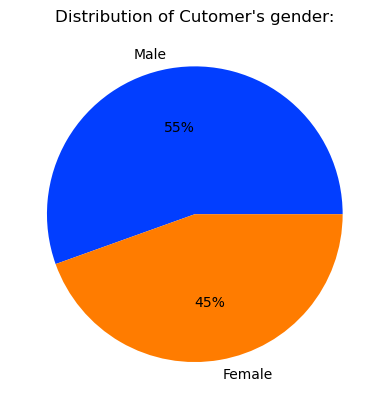

Distribution of cutomer's gender:
280273 Male
224933 Female


In [96]:
make_piechart(df, 'gender')

# There are more male customers in the company.


# -----------------------------------------------------------------------------------------

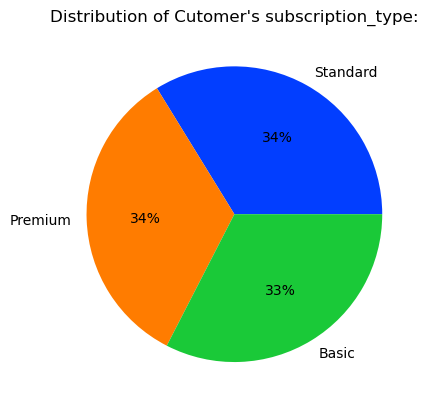

Distribution of cutomer's subscription_type:
170630 Standard
170099 Premium
164477 Basic


In [99]:
make_piechart(df, 'subscription_type')

# There is a close balance of customers among the three subscription types: Standard, Premium, and Basic.


# -----------------------------------------------------------------------------------------

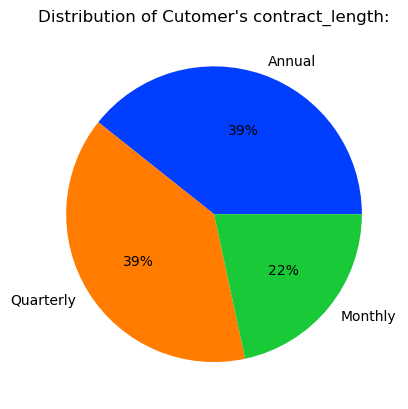

Distribution of cutomer's contract_length:
198608 Annual
197364 Quarterly
109234 Monthly


In [102]:
make_piechart(df, 'contract_length')

# Annual contracts and quarterly contracts have similar and the highest number of customers counts, followed by monthly contracts with the lowest customers.

# -----------------------------------------------------------------------------------------

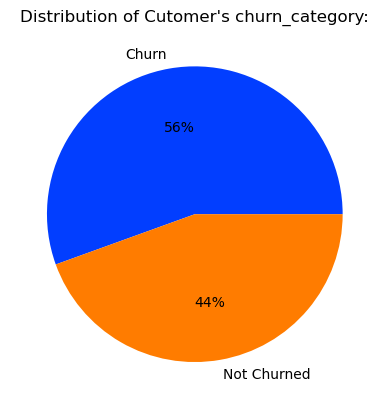

Distribution of cutomer's churn_category:
280492 Churn
224714 Not Churned


In [105]:
filtered = df.copy()
filtered['churn_category'] = ['Churn' if x == 1.0 else 'Not Churned' for x in df['churn']]
make_piechart(filtered, 'churn_category')

# The dataset contains more entries of churned customers.


--------------------------------------------------------------------------------------------------

# Descrete Data

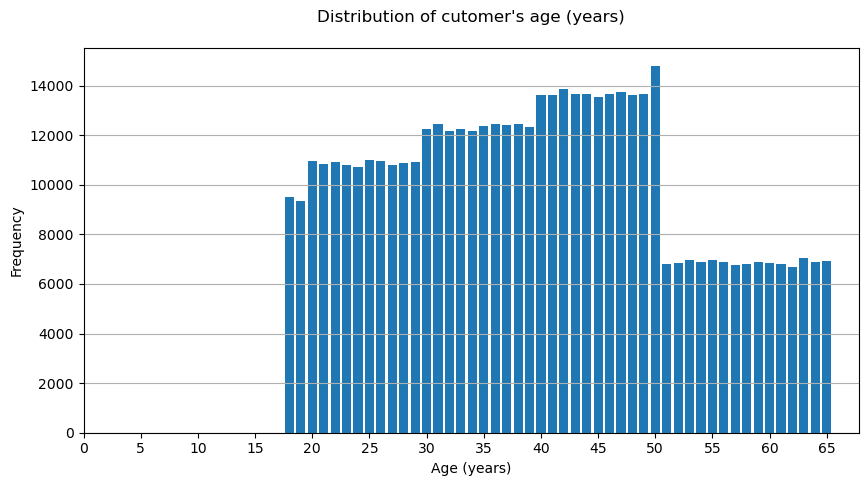

Distribution of cutomer's age (years): 39.70 ± 40.00 years
Median: 40.00 years
Minimum: 18 years
Maximum: 65 years

0.144 Skewness



In [109]:
make_barplot(df, 'age', custom_ticks=np.arange(0, 66, 5), additional=' (years)', unit='years')

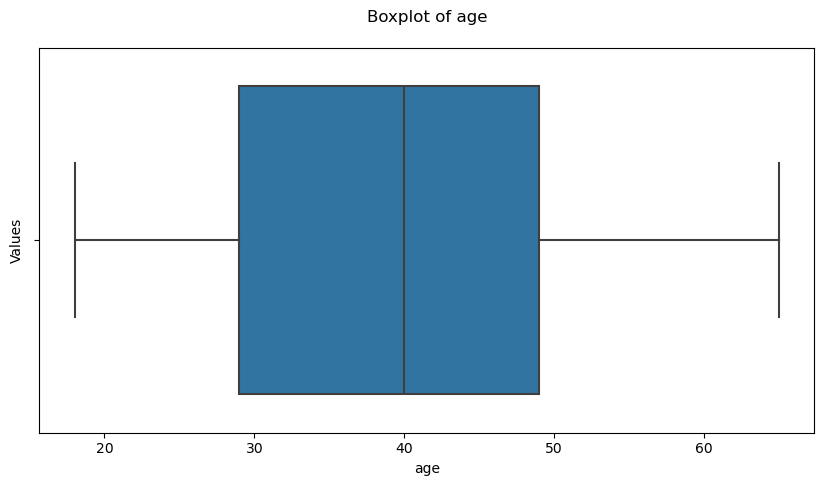

In [110]:
make_boxplot(df, 'age')

# Most customers are aged 40-50 with age 50 being the most common. There's very low number of customers of age 51 and above.

# -----------------------------------------------------------------------------------------

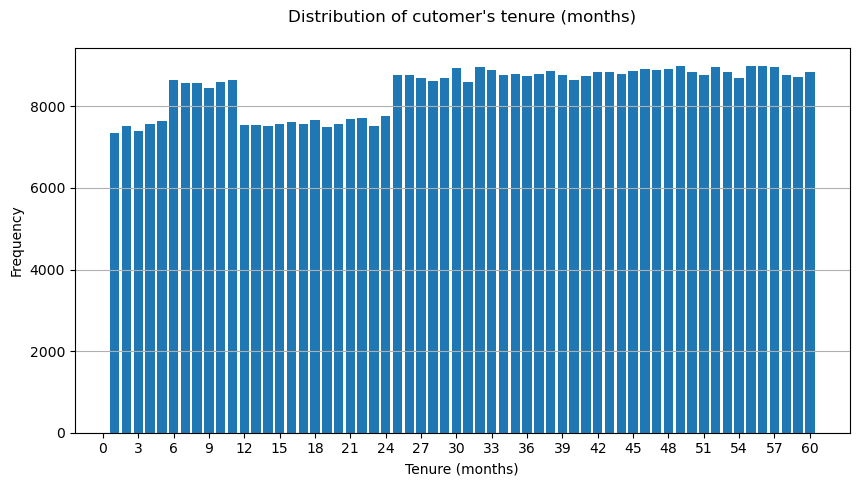

Distribution of cutomer's tenure (months): 31.35 ± 32.00 months
Median: 32.00 months
Minimum: 1 months
Maximum: 60 months

-0.070 Skewness



In [113]:
make_barplot(df, 'tenure', custom_ticks=np.arange(0, 61, 3), additional=' (months)', unit='months')

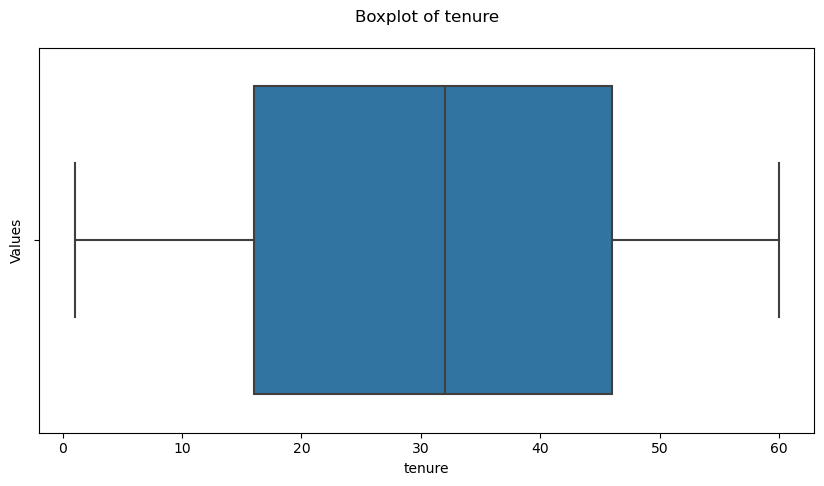

In [114]:
make_boxplot(df, 'tenure')

# Customers tend to have longer tenures with customer departures being more common during the 1-5 month and 12-24 month tenure periods.

# -----------------------------------------------------------------------------------------

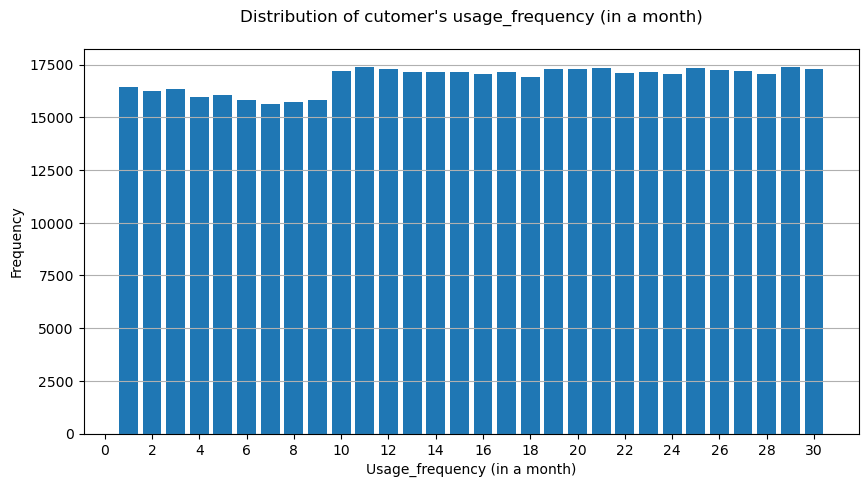

Distribution of cutomer's usage_frequency (in a month): 15.71 ± 16.00 times
Median: 16.00 times
Minimum: 1 times
Maximum: 30 times

-0.034 Skewness



In [117]:
make_barplot(df, 'usage_frequency', custom_ticks=np.arange(0, 31, 2), unit='times', additional=' (in a month)')

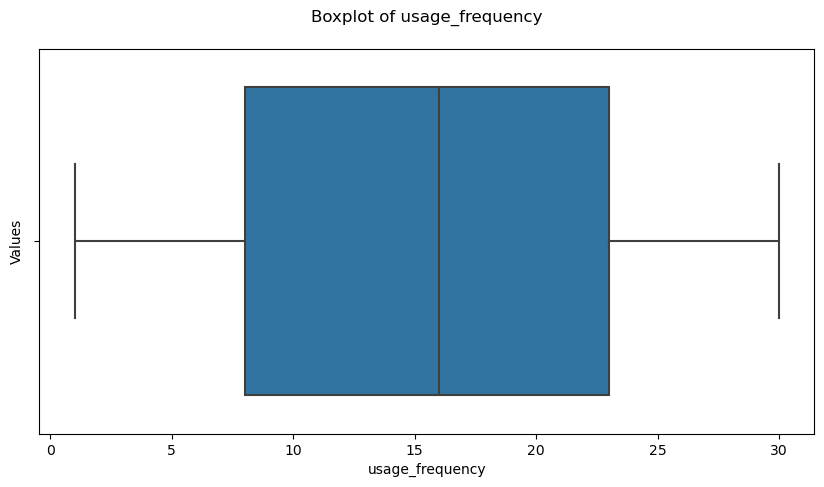

In [118]:
make_boxplot(df, 'usage_frequency')

# On average, customers tend to use company's services 16 times in a month, with a large variability in individual usage frequency suggesting diverse service consumption habits.

# -----------------------------------------------------------------------------------------

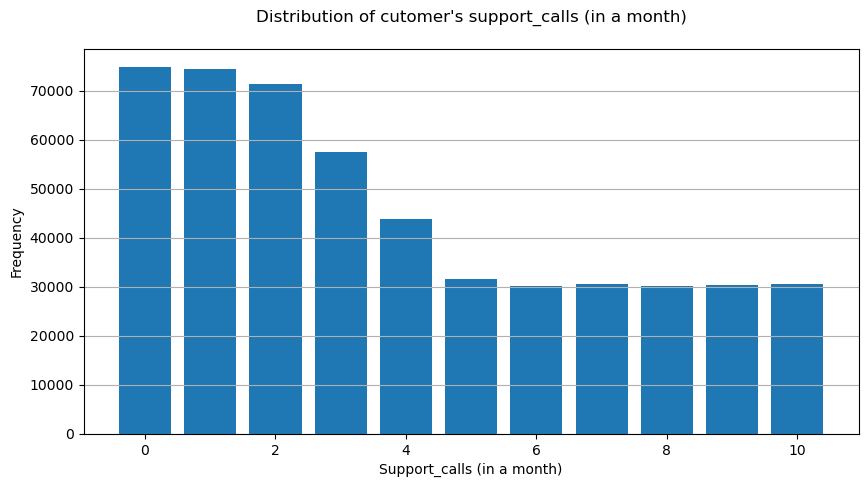

Distribution of cutomer's support_calls (in a month): 3.83 ± 3.00 calls
Median: 3.00 calls
Minimum: 0 calls
Maximum: 10 calls

0.544 Skewness



In [121]:
make_barplot(df, 'support_calls', unit='calls', additional=' (in a month)')

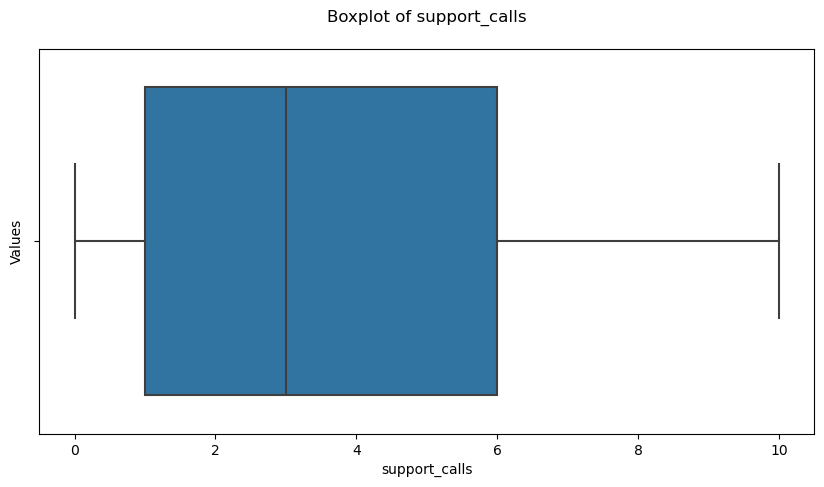

In [122]:
make_boxplot(df, 'support_calls')

# On average, customers tend to make 3 support calls in a month. Customers tend to make 1 or 2 support calls per month, with the most make no support calls at all.

# -----------------------------------------------------------------------------------------

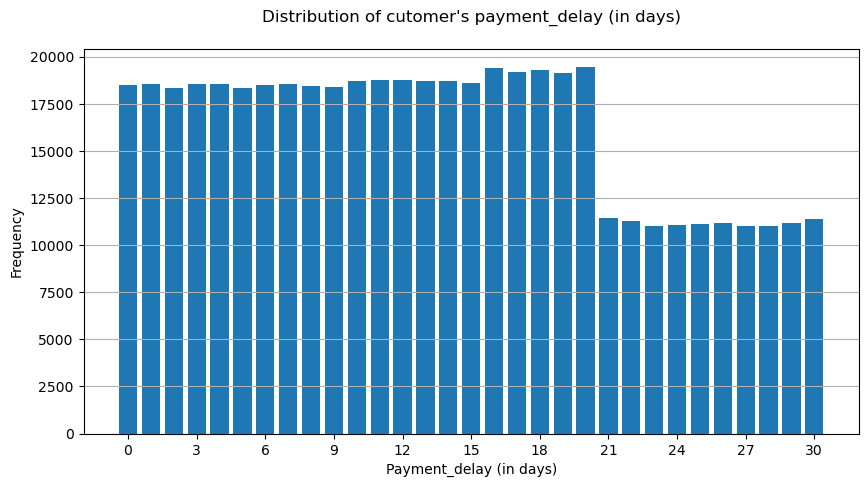

Distribution of cutomer's payment_delay (in days): 13.50 ± 13.00 days
Median: 13.00 days
Minimum: 0 days
Maximum: 30 days

0.200 Skewness



In [125]:
make_barplot(df, 'payment_delay', custom_ticks=np.arange(0, 32, 3), unit='days', additional=' (in days)')

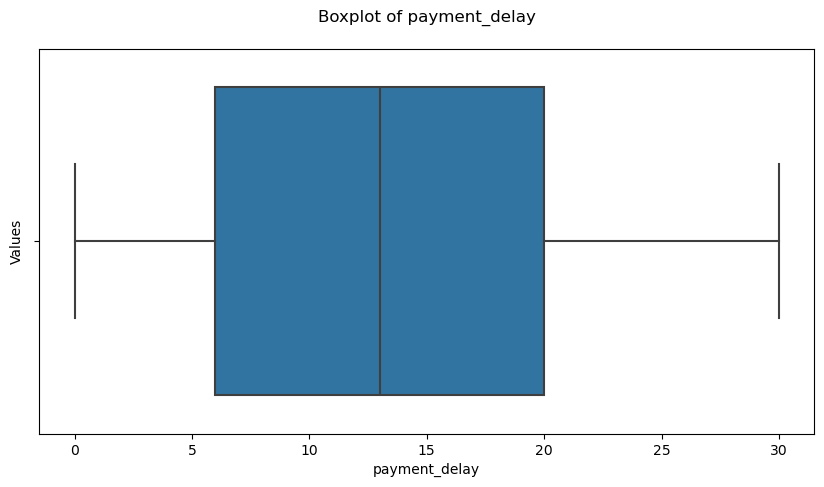

In [126]:
make_boxplot(df, 'payment_delay')

# On average, customers tend to delay their payments by 13 days, with a large variability in individual payment delay durations suggesting unpreferable diverse payment habits. Most customers pay within 20 days.

# -----------------------------------------------------------------------------------------

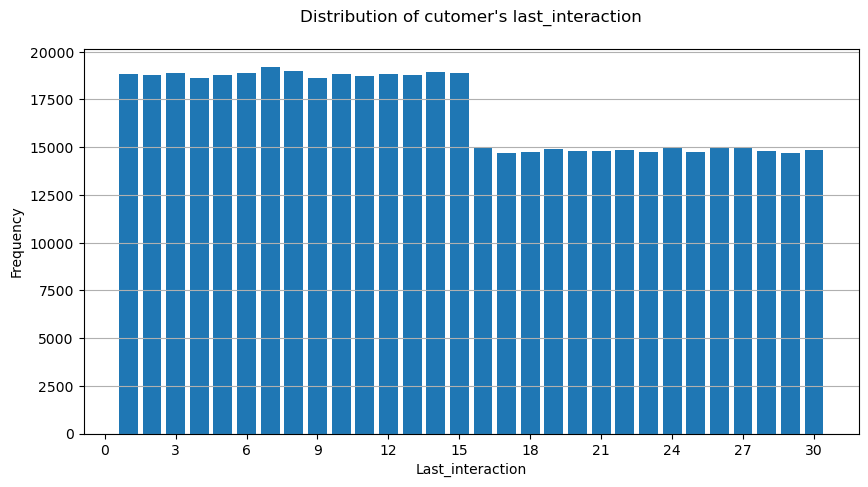

Distribution of cutomer's last_interaction: 14.61 ± 14.00 days
Median: 14.00 days
Minimum: 1 days
Maximum: 30 days

0.155 Skewness



In [129]:
make_barplot(df, 'last_interaction', custom_ticks=np.arange(0, 32, 3), unit='days', additional='')

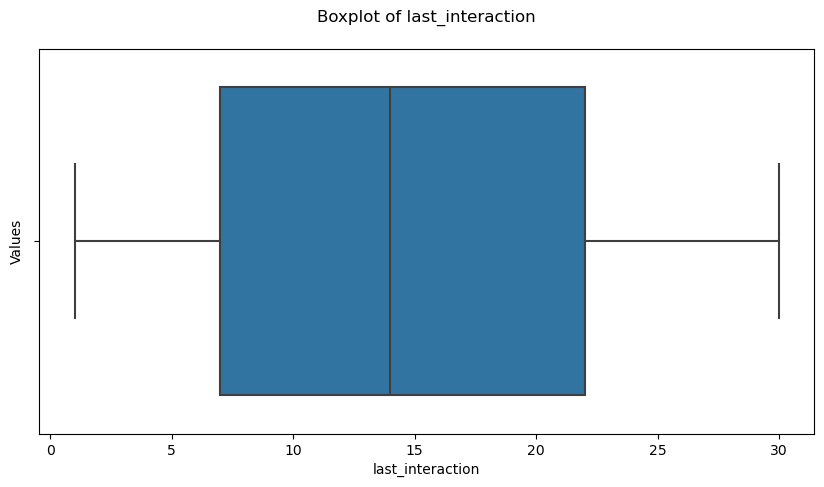

In [130]:
make_boxplot(df, 'last_interaction')

# Most customers tend to have 15 or less last interaction with average around 14 days.

# -----------------------------------------------------------------------------------------

## Continuous Data

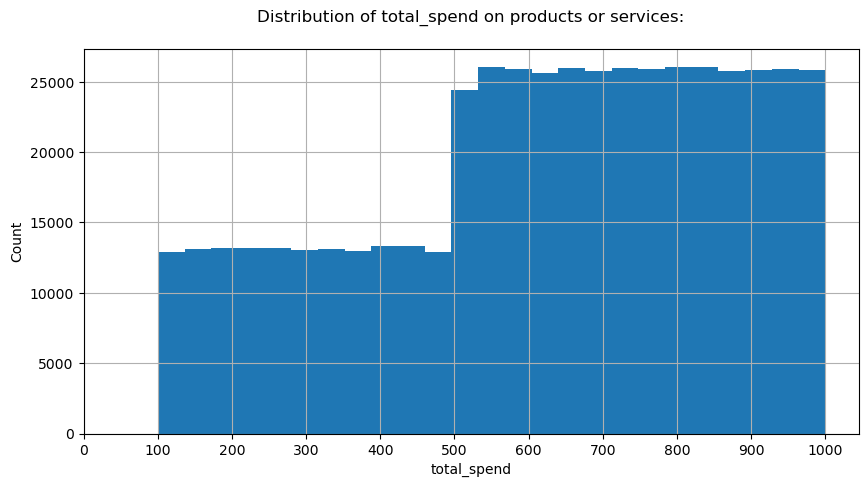

Distribution of total_spend on products or services: 620.07 ± 648.90 USD
Median: 648.90 USD
Minimum: 100.0 USD
Maximum: 1000.0 USD
-0.395 Skewness



In [134]:
make_histogram(df, 'total_spend', bins=25, custom_ticks=np.arange(0, 1001, 100), unit='USD', additional=" on products or services")

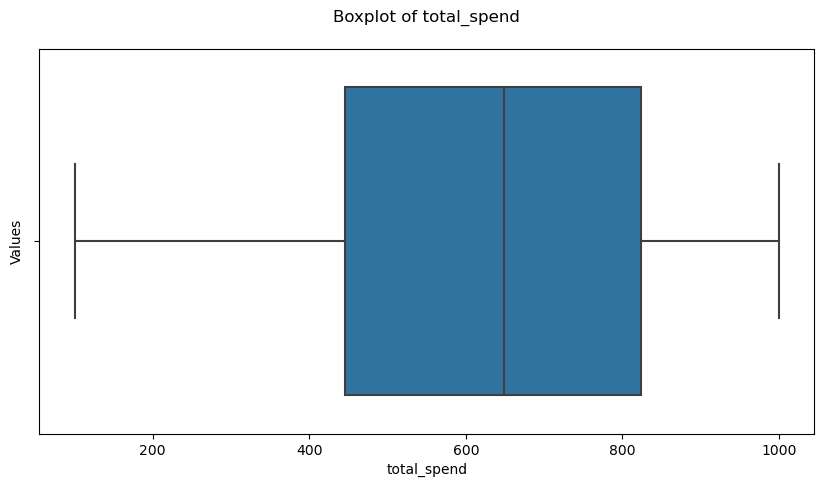

In [135]:
make_boxplot(df, 'total_spend')


   # On  average customer tend to send around 631.62 USD, with a large variability on customer spending. Most customers tend spend more than 500 USD.
# If we look at the histogram we can clearly see the division between customers who spend more and less is around 500. We can use this to divide customers into high value customers (total speding above 500) and low value customers (total speding below 500).


# -----------------------------------------------------------------------------------------

# Multivariate Analysis

## Do gender and churn rate have any relationship?

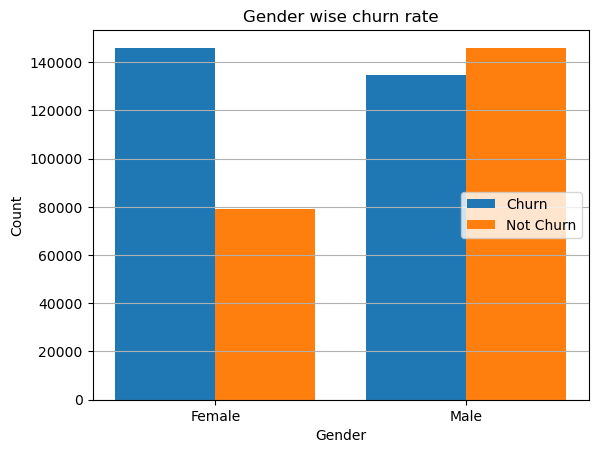

In [140]:
gender_churn = df.groupby(['gender', 'churn']).size().unstack()

X = list(gender_churn.index)
churn_0 = list(gender_churn.iloc[:, 0])
churn_1 = list(gender_churn.iloc[:, 1])
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title("Gender wise churn rate")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

# => Yes, gender and churn rate have relationship.
# Female customers exhibit a slightly higher churn rate compared to male customers. Active male customers (non-churned) is nearly double that of female customers.

# -----------------------------------------------------------------------------------------

## Are there any noticeable trends in payment delays among customers who churned?

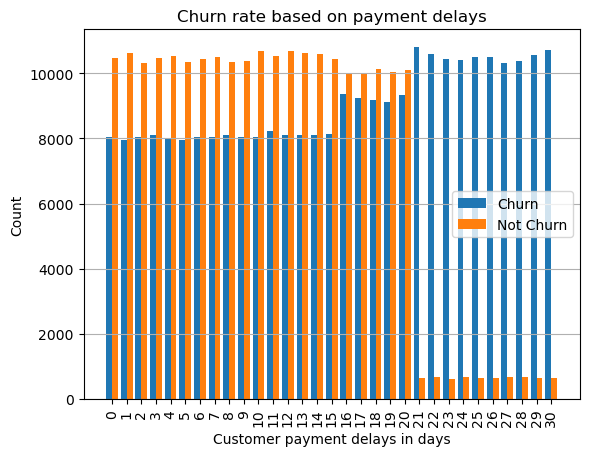

In [144]:
filtered = df.groupby(['payment_delay', 'churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X, rotation=90)
plt.xlabel("Customer payment delays in days")
plt.ylabel('Count')
plt.title("Churn rate based on payment delays")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

# => Customers who are not churned tend to have higher payment delay days as compared with churned customers till day 20, after which churned customers have payment delays just over 10 times than that of not churned customers.

# -----------------------------------------------------------------------------------------

## What is the distribution of usage frequency for churned vs. non-churned customers?

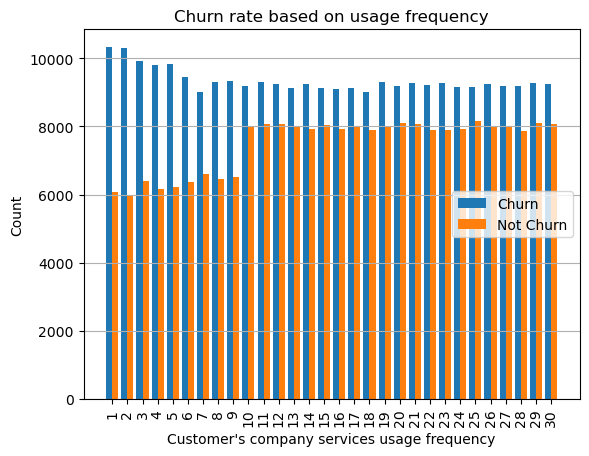

In [148]:
filtered = df.groupby(['usage_frequency', 'churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X, rotation=90)
plt.xlabel("Customer's company services usage frequency")
plt.ylabel('Count')
plt.title("Churn rate based on usage frequency")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

# => Churned customer tend to use company's services significantly more than customers who are not churned.

# -----------------------------------------------------------------------------------------

## Are customers with longer tenures less likely to churn?

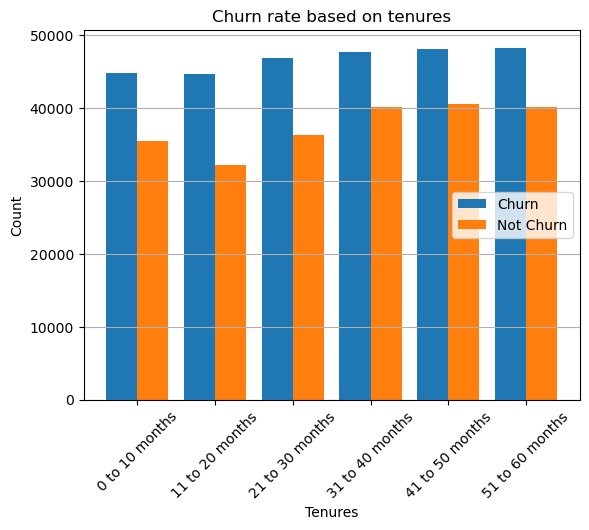

In [152]:
def categorize_age(age):
    if 0 <= age <= 10:
        return '0 to 10 months'
    elif 11 <= age <= 20:
        return '11 to 20 months'
    elif 21 <= age <= 30:
        return '21 to 30 months'
    elif 31 <= age <= 40:
        return '31 to 40 months'
    elif 41 <= age <= 50:
        return '41 to 50 months'
    elif 51 <= age <= 60:
        return '51 to 60 months'
    else:
        pass # For nan values

filtered = df.copy()
filtered['tenure_segmentation'] = df['tenure'].apply(categorize_age)
filtered = filtered.groupby(['tenure_segmentation', 'churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X, rotation=45)
plt.xlabel('Tenures')
plt.ylabel('Count')
plt.title("Churn rate based on tenures")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

# => No, customers with longer tenures are more likely to churn.

# -----------------------------------------------------------------------------------------

## Do customers with more support calls tend to churn more?

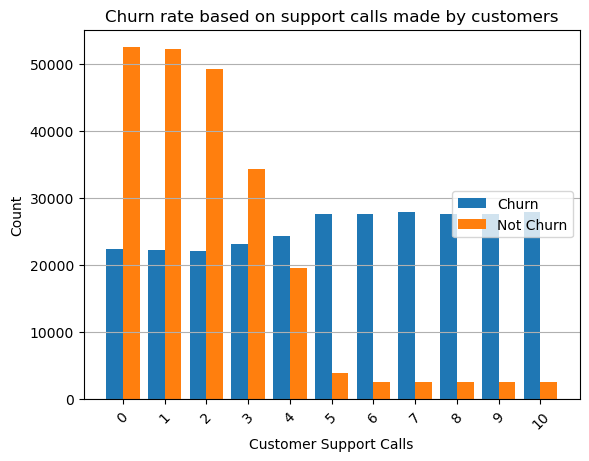

In [156]:
filtered = df.groupby(['support_calls', 'churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X, rotation=45)
plt.xlabel('Customer Support Calls')
plt.ylabel('Count')
plt.title("Churn rate based on support calls made by customers")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

# => Yes, customers with more support calls tend to churn more. On the contrary, customers who are not churned tend to make much more 0 to 3 customer support calls than churned customers, after which churned customers make significantly more calls.

# -----------------------------------------------------------------------------------------

## Does the subscription type influence the churn rate?

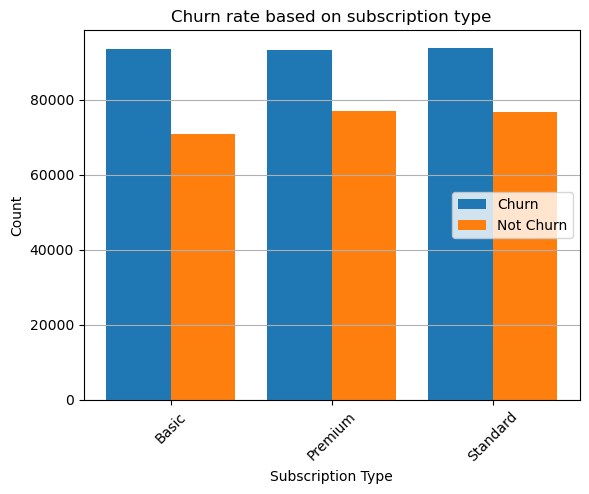

In [160]:
filtered = df.groupby(['subscription_type', 'churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X, rotation=45)
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.title("Churn rate based on subscription type")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

# => No, the subscription type does not influence customer churn rate. Customers who are not churned tend to choose premium or standard subscription type slightly more than basic subscription.

# -----------------------------------------------------------------------------------------

## Is there a pattern in contract length for customers who churned?

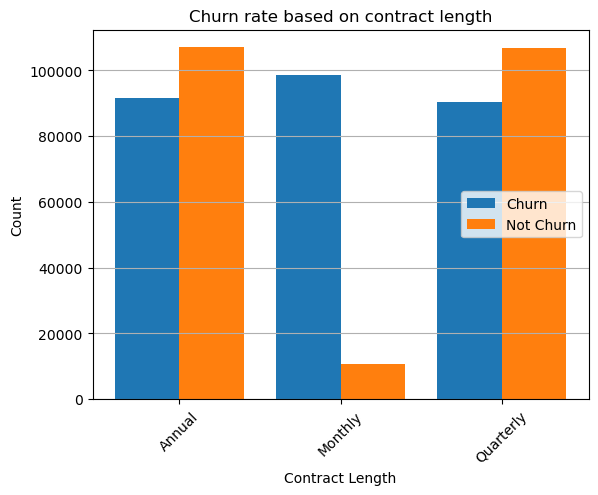

In [164]:
filtered = df.groupby(['contract_length', 'churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X, rotation=45)
plt.xlabel('Contract Length')
plt.ylabel('Count')
plt.title("Churn rate based on contract length")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

# => Customers with quarterly contract lengths have the lowest churn rate, while those with monthly contract lengths exhibit the highest churn rate. Conversely, customers who do not churn overwhelmingly prefer annual and quarterly contracts over monthly contracts.

# -----------------------------------------------------------------------------------------

## Is there a correlation between total spend and churn rate?

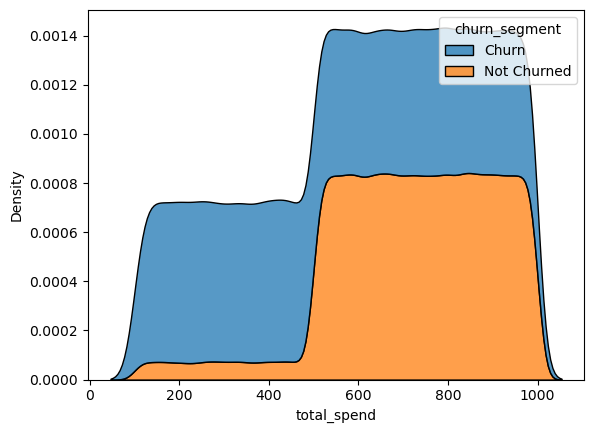

In [168]:
filtered = df.copy()
filtered['churn_segment'] = ['Churn' if x == 1.0 else 'Not Churned' for x in df['churn']]

sns.kdeplot(data=filtered, x="total_spend", hue="churn_segment", multiple="stack")
plt.show()

# => Customers who churn tends to spend significantly more money than those who don't.Both churn and not churned customers share common total spending distribution / total spending behavior.

# -----------------------------------------------------------------------------------------

# Correlation

# Independent Features Correlation

In [173]:
independent_features_df = df.select_dtypes(include=['number']).copy().drop(columns=['churn'])

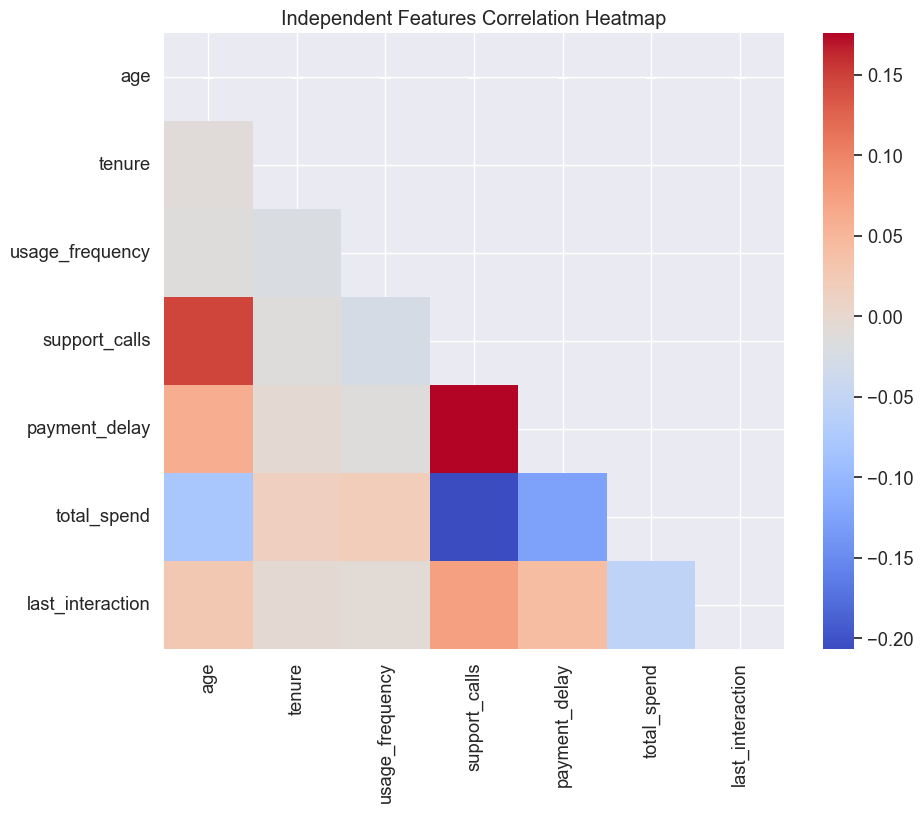

In [174]:
corr_matrix = independent_features_df.corr()

# Creating a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
plt.title("Independent Features Correlation Heatmap")
plt.show()

# Inpedendent features correlation with prediction labels

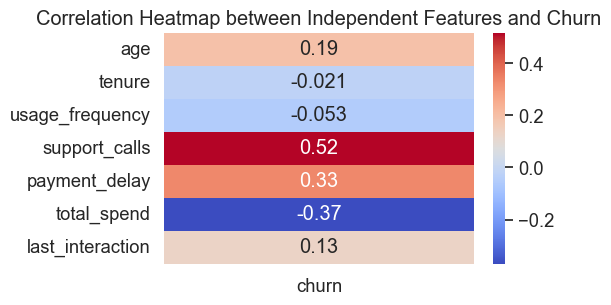

In [176]:
correlation_data = df.select_dtypes(include=['number']).corr().loc[:'last_interaction', 'churn']


# Create a heatmap
plt.figure(figsize=(5, 3))
sns.set(font_scale=1.2)
sns.heatmap(correlation_data.to_frame(), annot=True, cmap="coolwarm", cbar=True)

plt.title("Correlation Heatmap between Independent Features and Churn")
plt.show()

# Duplicates

In [178]:
df[df.duplicated()]

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn


**There are no duplicates**

# Null values

**Missing values were dropped pre EDA because there was just a single row of missing values which before performing analysis won't affect result of analysis.**

# Train-Test Split

In [183]:
y = df['churn']
X = df.drop(columns='churn')

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Reset the index of the resulting DataFrames
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [185]:
X_train

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction
0,19,Female,48,7,3,30,Premium,Annual,787.00,29
1,65,Female,11,20,9,14,Standard,Monthly,562.00,13
2,38,Male,8,20,1,4,Basic,Quarterly,961.86,8
3,38,Female,59,25,10,4,Premium,Annual,706.00,14
4,46,Male,38,24,10,16,Standard,Annual,260.00,25
...,...,...,...,...,...,...,...,...,...,...
404159,24,Female,1,4,2,18,Standard,Quarterly,740.72,15
404160,62,Male,29,23,9,24,Standard,Quarterly,327.10,11
404161,34,Male,13,16,1,6,Premium,Quarterly,520.36,23
404162,35,Male,23,18,4,10,Standard,Monthly,420.00,3


In [186]:
X_test

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction
0,58,Male,2,20,6,24,Standard,Quarterly,664.00,20
1,52,Male,14,13,2,13,Standard,Monthly,650.00,9
2,46,Male,38,3,0,9,Basic,Annual,571.47,24
3,29,Female,59,27,5,22,Basic,Quarterly,502.00,2
4,42,Male,29,7,1,20,Basic,Annual,541.34,10
...,...,...,...,...,...,...,...,...,...,...
101037,29,Male,33,9,1,1,Basic,Annual,801.41,29
101038,34,Male,43,28,9,11,Standard,Annual,435.00,30
101039,50,Female,40,13,0,1,Premium,Quarterly,651.28,9
101040,49,Female,46,6,0,20,Standard,Quarterly,897.68,2


# Validating Categorical Columns in Test Data

In [188]:
def validate_test_data_categorical_columns(train_df, test_df):
    # Get the list of categorical columns for both train and test DataFrames
    train_df_categorical_columns = train_df.select_dtypes(include=['object', 'category']).columns.tolist()
    test_df_categorical_columns = test_df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Check if the number of categorical columns is the same in both DataFrames
    if len(set(train_df_categorical_columns).intersection(set(test_df_categorical_columns))) == 0:
        print('Train and test dataframes have different categorical columns')
        return
    else:
        for cat_col in test_df_categorical_columns:
            # Create sets of unique values for the current categorical column in both DataFrames
            train_col = set(x for x in train_df[cat_col].unique().tolist() if not pd.isna(x))
            test_col = set(x for x in test_df[cat_col].unique().tolist() if not pd.isna(x))
            
            # Check if the sets are not equal, indicating different unique values
            if train_col != test_col:
                print(f'{cat_col} column has different unique values in train and test data:')
                print(f'Unique values in train data: {train_col}')
                print(f'Unique values in test data: {test_col}')
                return
        
        print('All categorical columns have consistent unique values in train and test data.')
        return
    
validate_test_data_categorical_columns(X_train, X_test)

All categorical columns have consistent unique values in train and test data.


# One Hot Encoding

In [190]:
encoder = OneHotEncoder(sparse_output=False)

encoder.fit(X_train[['gender', 'subscription_type', 'contract_length']])

OneHotEncoder(sparse_output=False)

In [191]:
feature_names = encoder.get_feature_names_out(['gender', 'subscription_type', 'contract_length'])
feature_names

array(['gender_Female', 'gender_Male', 'subscription_type_Basic',
       'subscription_type_Premium', 'subscription_type_Standard',
       'contract_length_Annual', 'contract_length_Monthly',
       'contract_length_Quarterly'], dtype=object)

In [192]:
train_categorical_one_encoded_data = encoder.transform(X_train[['gender', 'subscription_type', 'contract_length']])
train_OHE_df = pd.DataFrame(train_categorical_one_encoded_data, columns=feature_names)

test_categorical_one_encoded_data = encoder.transform(X_test[['gender', 'subscription_type', 'contract_length']])
test_OHE_df = pd.DataFrame(test_categorical_one_encoded_data, columns=feature_names)

In [193]:
train_OHE_df.head(3)

,gender_Female,gender_Male,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,contract_length_Annual,contract_length_Monthly,contract_length_Quarterly
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [194]:
test_OHE_df.head(3)

,gender_Female,gender_Male,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,contract_length_Annual,contract_length_Monthly,contract_length_Quarterly
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [195]:
X_train = X_train.drop(columns=['gender', 'subscription_type', 'contract_length'])
X_test = X_test.drop(columns=['gender', 'subscription_type', 'contract_length'])

In [196]:
X_train.head(3)

,age,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction
0,19,48,7,3,30,787.00,29
1,65,11,20,9,14,562.00,13
2,38,8,20,1,4,961.86,8


In [197]:
X_test.head(3)

,age,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction
0,58,2,20,6,24,664.00,20
1,52,14,13,2,13,650.00,9
2,46,38,3,0,9,571.47,24


In [198]:
X_train = pd.concat([X_train, train_OHE_df], axis=1)
X_test = pd.concat([X_test, test_OHE_df], axis=1)

In [199]:
X_train.head(3)

,age,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction,gender_Female,gender_Male,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,contract_length_Annual,contract_length_Monthly,contract_length_Quarterly
0,19,48,7,3,30,787.00,29,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,65,11,20,9,14,562.00,13,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,38,8,20,1,4,961.86,8,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [200]:
X_test.head(3)

,age,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction,gender_Female,gender_Male,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,contract_length_Annual,contract_length_Monthly,contract_length_Quarterly
0,58,2,20,6,24,664.00,20,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,52,14,13,2,13,650.00,9,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,46,38,3,0,9,571.47,24,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [201]:
# Saving the encoder to a file
with open('encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

In [202]:
# Example Usage

with open('encoder.pkl', 'rb') as file:
    loaded_encoder = pickle.load(file)
    
loaded_encoder.transform([['Male', 'Premium', 'Monthly']])

array([[0., 1., 0., 1., 0., 0., 1., 0.]])

# PCA

In [204]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

In [205]:
# Printing the explained variance ratio
pca.explained_variance_ratio_

array([0.98871624, 0.00488512])

In [206]:
data = {
    'Feature_1': X_pca[:, 0],
    'Feature_2': X_pca[:, 1],
    'Target': y_train
}

pca_df = pd.DataFrame(data)
pca_df

,Feature_1,Feature_2,Target
0,166.666719,16.831219,1
1,-58.457548,-20.683890,0
2,341.575218,-23.661122,0
3,85.736400,27.466815,1
4,-360.378519,6.762457,1
...,...,...,...
404159,120.403395,-30.069073,0
404160,-293.360318,-2.462884,1
404161,-99.932907,-18.172059,0
404162,-200.272137,-8.057019,1


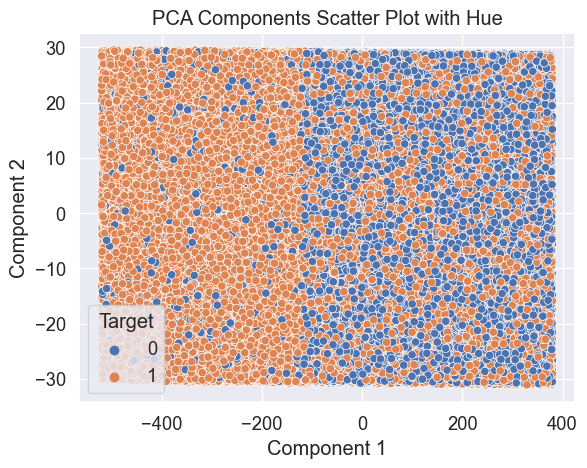

In [207]:
sns.scatterplot(data=pca_df, x='Feature_1', y='Feature_2', hue='Target')

# Set plot labels and title
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Components Scatter Plot with Hue')

# Show the plot
plt.legend(title='Target')
plt.show()

# Baseline models

In [209]:
def print_evaluation_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print()
    
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    print()

    class_report = classification_report(y_true, y_pred)
    print("Classification Report:")
    print(class_report)

In [210]:
def k_fold_cross_validation_with_metrics(classifier, X, y, k_folds=5):
    
    # Initializing stratified k-fold cross-validation
    stratified_kf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Lists to store the evaluation metrics for each fold
    accuracy_scores = []
    precision_scores = []
    recall_scores = []

    # Perform cross-validation
    for train_index, test_index in stratified_kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit the classifier on the training data
        classifier.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = classifier.predict(X_test)

        # Calculate evaluation metrics for this fold
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        # Append the metrics to their respective lists
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)

    # Calculate and print the mean of each metric across all folds
    mean_accuracy = np.mean(accuracy_scores)
    mean_precision = np.mean(precision_scores)
    mean_recall = np.mean(recall_scores)
    print("Mean Metrics Across Folds:")
    print(f"Mean Accuracy: {mean_accuracy:.2f}")
    print(f"Mean Precision: {mean_precision:.2f}")
    print(f"Mean Recall: {mean_recall:.2f}")

# Example usage:
# classifier = YourClassifier()  # Replace with your classifier of choice
# k_fold_cross_validation_with_metrics(classifier, X, y)


## Logistic Regression

In [212]:
model = LogisticRegression()

k_fold_cross_validation_with_metrics(model, X_train, y_train)

Mean Metrics Across Folds:
Mean Accuracy: 0.84
Mean Precision: 0.86
Mean Recall: 0.85


## Naive Bayes

In [214]:
# Gaussian Naive Bayes

gnb = GaussianNB()

k_fold_cross_validation_with_metrics(gnb, X_train, y_train)

Mean Metrics Across Folds:
Mean Accuracy: 0.86
Mean Precision: 0.90
Mean Recall: 0.83


In [215]:
#Multinomial Naive Bayes model

naive_bayes_model = MultinomialNB()

k_fold_cross_validation_with_metrics(naive_bayes_model, X_train, y_train)

Mean Metrics Across Folds:
Mean Accuracy: 0.74
Mean Precision: 0.81
Mean Recall: 0.70


## k-Nearest Neighbor

In [217]:
knn_classifier = KNeighborsClassifier()

k_fold_cross_validation_with_metrics(knn_classifier, X_train, y_train)

Mean Metrics Across Folds:
Mean Accuracy: 0.84
Mean Precision: 0.89
Mean Recall: 0.83


## Decision Trees

In [219]:
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

k_fold_cross_validation_with_metrics(decision_tree_classifier, X_train, y_train)

Mean Metrics Across Folds:
Mean Accuracy: 0.88
Mean Precision: 0.90
Mean Recall: 0.88


## Random Forest

In [221]:
rf_classifier = RandomForestClassifier(random_state=42)

k_fold_cross_validation_with_metrics(rf_classifier, X_train, y_train)

Mean Metrics Across Folds:
Mean Accuracy: 0.93
Mean Precision: 0.90
Mean Recall: 1.00


## Xgboost

In [223]:
xgb_classifier = xgb.XGBClassifier(random_state=42)

k_fold_cross_validation_with_metrics(xgb_classifier, X_train, y_train)

Mean Metrics Across Folds:
Mean Accuracy: 0.93
Mean Precision: 0.90
Mean Recall: 0.99


# Models Training

**Decision Trees, Random Forest & Xgboost all three have perfect score. I'll train them again but using the entire training dataset this time and use test dataset to validate the model. Focus will be on best recall.**

In [226]:
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [227]:
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [228]:
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

# Validating Models

In [230]:
# Testing decision trees

y_pred = decision_tree_classifier.predict(X_test)

print_evaluation_metrics(y_test, y_pred)

Accuracy: 0.88
Precision: 0.90
Recall: 0.89

Confusion Matrix:
[[39468  5291]
 [ 6452 49831]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     44759
           1       0.90      0.89      0.89     56283

    accuracy                           0.88    101042
   macro avg       0.88      0.88      0.88    101042
weighted avg       0.88      0.88      0.88    101042



In [231]:
# Testing random forest

y_pred = random_forest_classifier.predict(X_test)

print_evaluation_metrics(y_test, y_pred)

Accuracy: 0.94
Precision: 0.90
Recall: 1.00

Confusion Matrix:
[[38372  6387]
 [  170 56113]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92     44759
           1       0.90      1.00      0.94     56283

    accuracy                           0.94    101042
   macro avg       0.95      0.93      0.93    101042
weighted avg       0.94      0.94      0.93    101042



In [232]:
# Testing xgboost

y_pred = xgb_classifier.predict(X_test)

print_evaluation_metrics(y_test, y_pred)

Accuracy: 0.93
Precision: 0.90
Recall: 0.99

Confusion Matrix:
[[38400  6359]
 [  389 55894]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     44759
           1       0.90      0.99      0.94     56283

    accuracy                           0.93    101042
   macro avg       0.94      0.93      0.93    101042
weighted avg       0.94      0.93      0.93    101042



# Random Forest is the near perfect model since for the problem at hand, my focus is on improving recall